<a href="https://colab.research.google.com/github/Tin-code/Arbre-de-decision/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#importation des differents modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#1-recuperation du dataset Coeur
data = pd.read_excel(r'/content/gdrive/My Drive/Coeur.xlsx')

In [5]:
#2-copie de data dans df 
df = data.copy()


In [6]:
#3- Verifier s'il y a des doublons et les supprimer
df.duplicated().sum()
df.drop_duplicates()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


In [7]:
#4- Verifier s'il existe des variables constante(variable avec une seule modalité)
df.nunique()

AGE             50
SEXE             2
TDT              4
PAR             67
CHOLESTEROL    222
GAJ              2
ECG              3
FCMAX          119
ANGINE           2
DEPRESSION      53
PENTE            3
CŒUR             2
dtype: int64

In [8]:
#5-Verifier s'il y a des données manquante 
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [9]:
#6- Normalisation des variables quantitatives : First step

var_quant = df.drop('CŒUR', axis= 1).select_dtypes(np.number)
var_quant

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
913,45,110,264,0,132,1.2
914,68,144,193,1,141,3.4
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


In [10]:
for i in var_quant.select_dtypes(np.number):
  var_quant[i] = var_quant[i]/var_quant[i].max()
var_quant

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION
0,0.519481,0.70,0.479270,0.0,0.851485,0.000000
1,0.636364,0.80,0.298507,0.0,0.772277,0.161290
2,0.480519,0.65,0.469320,0.0,0.485149,0.000000
3,0.623377,0.69,0.354892,0.0,0.534653,0.241935
4,0.701299,0.75,0.323383,0.0,0.603960,0.000000
...,...,...,...,...,...,...
913,0.584416,0.55,0.437811,0.0,0.653465,0.193548
914,0.883117,0.72,0.320066,1.0,0.698020,0.548387
915,0.740260,0.65,0.217247,0.0,0.569307,0.193548
916,0.740260,0.65,0.391376,0.0,0.861386,0.000000


In [11]:
#7-Faire le recodage de toutes les variables qualitative
def recod(params):
  return params.astype('category').cat.codes

In [12]:
def recod_global(data):
  for col in data.select_dtypes('object').columns:
    data[col] = recod(data[col])
    return data


In [23]:
recod_global(df)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,1,0,140,289,0,1,172,0,0.0,0,0
1,49,0,3,160,180,0,1,156,0,1.0,2,1
2,37,1,0,130,283,0,2,98,0,0.0,0,0
3,48,0,1,138,214,0,1,108,1,1.5,2,1
4,54,1,3,150,195,0,1,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,2,110,264,0,1,132,0,1.2,2,1
914,68,1,1,144,193,1,1,141,0,3.4,2,1
915,57,1,1,130,131,0,1,115,1,1.2,2,1
916,57,0,0,130,236,0,0,174,0,0.0,2,1


In [24]:
#8-Separation des données 

Y = df[['CŒUR']]
X = df[['AGE','SEXE','TDT', 'PAR','CHOLESTEROL','GAJ','ECG','FCMAX','ANGINE','DEPRESSION ','PENTE']]
X

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE
0,40,1,0,140,289,0,1,172,0,0.0,0
1,49,0,3,160,180,0,1,156,0,1.0,2
2,37,1,0,130,283,0,2,98,0,0.0,0
3,48,0,1,138,214,0,1,108,1,1.5,2
4,54,1,3,150,195,0,1,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,2,110,264,0,1,132,0,1.2,2
914,68,1,1,144,193,1,1,141,0,3.4,2
915,57,1,1,130,131,0,1,115,1,1.2,2
916,57,0,0,130,236,0,0,174,0,0.0,2


In [25]:
#9-Utilisation de la fonction train_test_split du module model_selection de sklearn

from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=4)
print('Train_set :',X_train.shape)
print('test_set :',X_test.shape)

Train_set : (734, 11)
test_set : (184, 11)


In [39]:
#10-Arbre de décision  
from sklearn.tree import DecisionTreeClassifier

In [28]:
Decis_tree = DecisionTreeClassifier(random_state=1)
Decis_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [29]:
#11- Affichage de la probabilité d'appartenance à chacune des classes de la variable coeur

Decis_tree.predict_proba(X_test[:5])

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [30]:
#12- Prediction de la classe d'appartenance de chaque individu de X_test
y_pred = Decis_tree.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1])

#13- Matrice de confusion, taux de succès, sensibilité et précision du model

In [31]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
mat_conf = confusion_matrix(y_pred,y_test)
mat_conf

array([[71, 16],
       [17, 80]])

In [32]:
#accuracy_score 
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_pred,y_test)
acc_score

0.8206521739130435

In [33]:
#recall score 
from sklearn.metrics import recall_score
rec_score = recall_score(y_pred,y_test)
rec_score

0.8247422680412371

In [34]:
#precision score
from sklearn.metrics import precision_score
prec_score = precision_score(y_pred,y_test)
prec_score

0.8333333333333334

In [36]:
#Enrégistrement du model pour pouvoir le déployer
import pickle
pickle.dump(Decis_tree,open('tree_model.pkl','wb'))

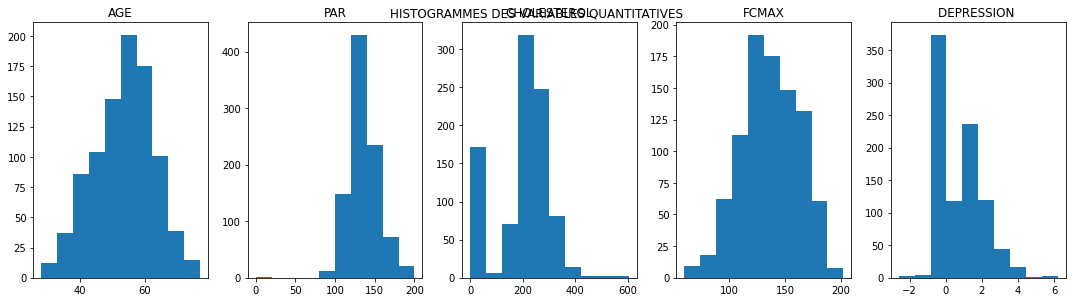

In [37]:
#Affichage de l'histogramme des variables quantitatives
quant = ['AGE','PAR','CHOLESTEROL', 'FCMAX', 'DEPRESSION ']
plt.figure(tight_layout = True, figsize = (15,8))
plt.suptitle("HISTOGRAMMES DES VARIABLES QUANTITATIVES")
for y,x in enumerate(quant):
    plt.subplot(2,5,y+1)
    plt.hist(df[x])
    plt.title(f"{quant[y]}")
plt.show()

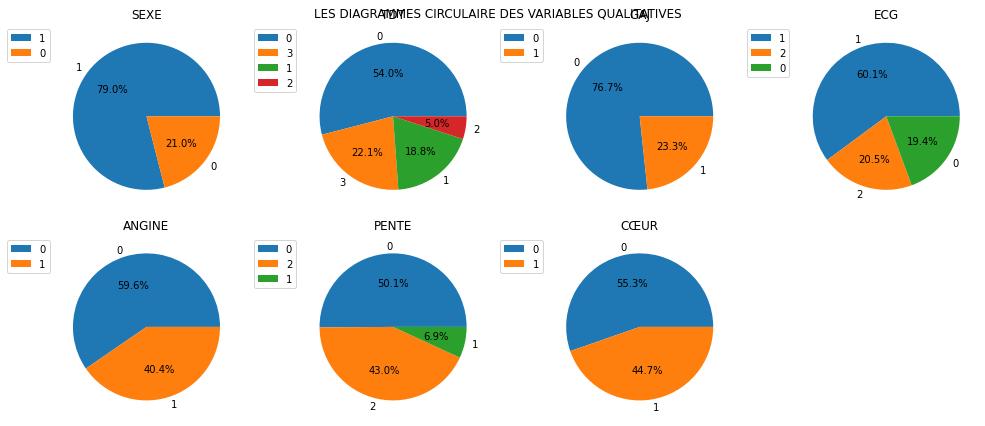

In [38]:
# Affichage du diagramme circulaire des variables qualitatives
qual = ['SEXE', 'TDT', 'GAJ', 'ECG', 'ANGINE', 'PENTE', 'CŒUR'] # la liste des variables qualitatives
plt.figure(tight_layout = True, figsize = (14,6))
plt.suptitle("LES DIAGRAMMES CIRCULAIRE DES VARIABLES QUALITATIVES")
for y,x in enumerate(qual):
    eff = df[x].value_counts()
    modalite = df[x].unique()
    plt.subplot(2,4,y+1)
    plt.pie(eff, labels = modalite, autopct = '%1.1f%%')
    plt.legend(bbox_to_anchor = (0, 1))
    plt.title(f"{qual[y]}")
plt.show()

In [ ]:
X_test.head(10)

In [ ]:
y_test.head(10)